In [23]:
import pandas as pd
from pyarrow import csv
import numpy as np
import networkx as nx
from functools import reduce
#import sweetviz as sv
import matplotlib.pyplot as plt

import timeit
import time

In [24]:
trainData_file=csv.read_csv('Data/trainData_normalized_nolinks_19k_day26.csv')
training_df2 =  trainData_file.to_pandas()
training_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp000566,-0.177870,-0.003321,0.007892,0.026223,0.409230,Missing,-0.844850,3.867257,-0.063454,3.979788,4.864437,4.355324,-0.022570,-0.006817,-0.014255,-0.020239,-0.017742,-0.017745
1,ActiveDirectory,Comp001022,-0.174139,-0.024066,0.005264,0.103961,0.410655,Missing,-0.844850,3.867257,-0.065245,-0.195614,-0.258417,-0.153870,-0.022631,-0.006843,-0.014328,-0.020239,-0.017742,-0.017745
2,ActiveDirectory,Comp002524,-0.153593,-0.023882,0.051804,0.288587,0.418493,Missing,-0.843466,3.867257,-0.065501,-0.195614,-0.258417,-0.153870,-0.022631,-0.006843,-0.014328,-0.020239,-0.017742,-0.017745
3,ActiveDirectory,Comp003688,-0.162913,-0.024536,0.028752,0.162264,0.414930,Missing,-0.845404,3.867257,-0.065501,-0.195185,-0.249235,-0.152977,-0.022631,-0.006845,-0.014329,-0.020236,-0.017722,-0.017740
4,ActiveDirectory,Comp005295,-0.144256,0.050640,0.139567,0.356607,0.422056,Missing,-0.842358,3.867257,-0.065373,-0.178746,-0.227198,-0.134813,-0.022631,-0.006845,-0.014329,-0.020236,-0.017721,-0.017740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366347,Comp273343,Comp017911,-0.196590,-0.025835,-0.046420,-0.109574,-2.684697,NoLink,-0.843466,-0.356904,-0.065629,-0.195631,-0.258784,-0.153905,-0.022631,-0.006845,-0.014329,-0.020239,-0.017742,-0.017745
366348,Comp852778,Comp987487,1.291678,-0.025761,-0.034967,-0.109412,-1.910859,NoLink,-0.845404,-0.368901,-0.065629,-0.195631,-0.258784,-0.153905,-0.022631,-0.006845,-0.014329,-0.020239,-0.017742,-0.017745
366349,Comp010016,Comp284265,0.745980,-0.025816,-0.042716,-0.109780,-1.912284,NoLink,-0.845958,-0.368901,-0.065629,-0.195631,-0.258784,-0.153905,-0.022631,-0.006845,-0.014329,-0.020239,-0.017742,-0.017745
366350,Comp776638,Comp428151,7.053947,-0.025293,-0.005395,-0.109505,-1.905871,NoLink,-0.844850,-0.374233,-0.065629,-0.195631,-0.258784,-0.153905,-0.022631,-0.006845,-0.014329,-0.020239,-0.017742,-0.017745


In [25]:
testData_file=csv.read_csv('Data/testData_normalized_nolinks_19k_day26.csv')
testing_df2 =  testData_file.to_pandas()
testing_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp003448,-0.164569,-0.021453,0.019078,0.057125,0.445926,Missing,-0.844573,2.305024,-0.065501,-0.195151,-0.248501,-0.152906,-0.022631,-0.006845,-0.014329,-0.020236,-0.017722,-0.017740
1,ActiveDirectory,Comp004355,-0.176000,-0.025523,-0.010828,0.001478,0.442363,Missing,-0.845681,2.305024,-0.065373,-0.195614,-0.258417,-0.153870,-0.022631,-0.006844,-0.014328,-0.020239,-0.017742,-0.017745
2,ActiveDirectory,Comp009410,-0.157698,-0.017725,0.039823,0.065075,0.448064,Missing,-0.845127,2.305024,-0.065501,-0.195562,-0.257315,-0.153762,-0.022629,-0.006831,-0.014325,-0.020239,-0.017742,-0.017745
3,ActiveDirectory,Comp014675,-0.166838,-0.025305,0.005851,0.009427,0.445214,Missing,-0.845681,2.305024,-0.065245,0.313000,5.662542,0.646599,-0.022626,-0.006822,-0.014321,-0.020239,-0.017742,-0.017745
4,ActiveDirectory,Comp014941,-0.175995,-0.025148,-0.009097,-0.014422,0.442363,Missing,-0.845681,2.305024,-0.065501,-0.195614,-0.258417,-0.153870,-0.022630,-0.006838,-0.014327,-0.020239,-0.017742,-0.017745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243997,Comp050085,Comp972195,-0.196590,-0.025835,-0.046420,-0.109817,-4.228097,NoLink,-0.845958,-0.392894,-0.065629,-0.195631,-0.258784,-0.153905,-0.022631,-0.006845,-0.014329,-0.020239,-0.017742,-0.017745
243998,Comp114983,Comp372203,6.087209,-0.025793,-0.042362,-0.109814,-1.895361,NoLink,-0.845681,-0.392894,-0.065629,-0.195631,-0.258784,-0.153905,-0.022631,-0.006845,-0.014329,-0.020239,-0.017742,-0.017745
243999,Comp639223,Comp158414,-0.196590,-0.025835,-0.046420,-0.109751,-3.062085,NoLink,-0.845404,-0.387562,-0.065629,-0.195631,-0.258784,-0.153905,-0.022631,-0.006845,-0.014329,-0.020239,-0.017742,-0.017745
244000,Comp155068,Comp382098,7.180043,-0.025383,-0.009723,-0.109570,-1.889660,NoLink,-0.845958,-0.372900,-0.065629,-0.195631,-0.258784,-0.153905,-0.022631,-0.006845,-0.014329,-0.020239,-0.017742,-0.017745


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_test, y_test = testing_df2[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment',  'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], testing_df2['Label']

model = RandomForestClassifier()
#model.fit(X_train, y_train)

#print(f"Accuracy on the test set: {accuracy_score(y_test, model.predict(X_test))}")

In [27]:
len(training_df2[training_df2["Label"]=="Continuing"])


153676

In [28]:
len(training_df2[training_df2["Label"]=="Missing"])


156371

In [29]:
len(training_df2[training_df2["Label"]=="New"])

36309

In [30]:
len(training_df2[training_df2["Label"]=="NoLink"])

19996

In [31]:
len(testing_df2[testing_df2["Label"]=="Continuing"])

145250

In [32]:
len(testing_df2[testing_df2["Label"]=="Missing"])

44735

In [33]:
len(testing_df2[testing_df2["Label"]=="New"])

34020

In [34]:
TrainTest=[]
TrainTest.append(training_df2)
TrainTest.append(testing_df2)

In [35]:
trainData=training_df2.copy()

In [36]:
train_Cont_df=trainData[trainData["Label"]=="Continuing"]
train_Miss_df=trainData[trainData["Label"]=="Missing"]
train_New_df=trainData[trainData["Label"]=="New"]
train_NoLink_df=trainData[trainData["Label"]=="NoLink"]

In [37]:
# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLink']
#report_2 = classification_report(y_test, pred, target_names=target_names)
#print(f"Test Score\t {pred}")
#print(report_2)

In [38]:
dfc=train_Cont_df.sample(n = 19000)
dfm=train_Miss_df.sample(n = 19000)
dfn=train_New_df.sample(n = 19000)
dfnl=train_NoLink_df.sample(n = 19000)

In [39]:
trainData_df3=pd.concat([dfc,dfm,dfn,dfnl],ignore_index=True)
X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']


Accuracy on the test set: 0.734707092564815
Confusion Matrix: 
 [[145250      0      0      0]
 [ 44735      0      0      0]
 [     0      0  34020      0]
 [     0      0  19997      0]]


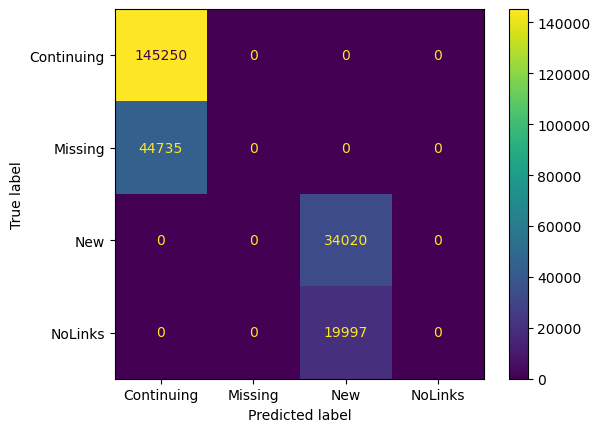

/home/asha/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/asha/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Continuing       0.76      1.00      0.87    145250
     Missing       0.00      0.00      0.00     44735
         New       0.63      1.00      0.77     34020
     NoLinks       0.00      0.00      0.00     19997

    accuracy                           0.73    244002
   macro avg       0.35      0.50      0.41    244002
weighted avg       0.54      0.73      0.62    244002



/home/asha/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


AB_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
AB_clf.fit(X_train_3, y_train_3)
pred_adaboost = AB_clf.predict(X_test)
Adaboost_Accuracy_score=accuracy_score(y_test, pred_adaboost)

print(f"Accuracy on the test set: {Adaboost_Accuracy_score}")

# Step 5 Performance Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix
#print("Sample size for Computer Work   =",(X['Activity']==2).sum())

pred_adaboost = AB_clf.predict(X_test)
cm_adaboost = confusion_matrix(y_test, pred_adaboost)

print('Confusion Matrix: \n', cm_adaboost)

#step 5 Performance Evaluation: Confusion Matrix Visualization
import matplotlib.pyplot as plt

class_names=['Continuing','Missing','New','NoLinks']
from sklearn.metrics import ConfusionMatrixDisplay
AB_disp = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost, display_labels=class_names)
AB_disp.plot(values_format="d")
#disp.plot()
plt.show()

# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLinks']
AB_report = classification_report(y_test, pred_adaboost, target_names=target_names)
#print(f"Test Score\t {pred}")
print(AB_report)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

XGB = GradientBoostingClassifier(n_estimators=50, learning_rate=0.001, random_state=0)
XGB.fit(X_train_3, y_train_3)
pred_XGB = XGB.predict(X_test)

XGB_Accuracy_score=accuracy_score(y_test, pred_XGB)

print(f"Accuracy on the test set with Gradient_Boosting_Classifier : {XGB_Accuracy_score}")

# Step 5 Performance Evaluation: Confusion Matrix

pred_XGB = XGB.predict(X_test)
cm_XGB = confusion_matrix(y_test, pred_XGB)

print('Confusion Matrix: \n', cm_XGB)


# Step 5 Performance Evaluation: 

target_names=['Continuing','Missing', 'New','NoLinks']
XGB_report = classification_report(y_test, pred_XGB, target_names=target_names)
#print(f"Test Score\t {pred}")
print(XGB_report)

Accuracy on the test set with Gradient_Boosting_Classifier : 0.7043835706264703
Confusion Matrix: 
 [[87992 57258     0     0]
 [11218 33517     0     0]
 [    0     0 30583  3437]
 [    0     0   218 19779]]
              precision    recall  f1-score   support

  Continuing       0.89      0.61      0.72    145250
     Missing       0.37      0.75      0.49     44735
         New       0.99      0.90      0.94     34020
     NoLinks       0.85      0.99      0.92     19997

    accuracy                           0.70    244002
   macro avg       0.78      0.81      0.77    244002
weighted avg       0.80      0.70      0.73    244002



In [42]:
#rbf svm classifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Create a pipeline with StandardScaler and SVM with RBF kernel

svc_rbf_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize the features
    ("svm", SVC(kernel='rbf'))   ])  # SVM with RBF kernel

# Fit the pipeline to the training data
svc_rbf_pipeline.fit(X_train_3, y_train_3)


#make predictions on the test_set
pred_rbf_svc = svc_rbf_pipeline.predict(X_test)


rbf_SVC_Accuracy_score=accuracy_score(y_test, pred_rbf_svc)

print(f"Accuracy on the test set with rbf kernel of svm : {rbf_SVC_Accuracy_score}")




# Step 5 Performance Evaluation: Confusion Matrix
cm_rbf_SVC = confusion_matrix(y_test, pred_rbf_svc)
print('Confusion Matrix: \n', cm_rbf_SVC)

# Step 5 Performance Evaluation: 


target_names=['Continuing','Missing', 'New','NoLinks']
rbf_SVC_report = classification_report(y_test, pred_rbf_svc, target_names=target_names)
#print(f"Test Score\t {pred}")
print(rbf_SVC_report)

Accuracy on the test set with rbf kernel of svm : 0.6811665478151818
Confusion Matrix: 
 [[93012 52238     0     0]
 [20109 24626     0     0]
 [  332  1283 28693  3712]
 [    2     9   111 19875]]
              precision    recall  f1-score   support

  Continuing       0.82      0.64      0.72    145250
     Missing       0.32      0.55      0.40     44735
         New       1.00      0.84      0.91     34020
     NoLinks       0.84      0.99      0.91     19997

    accuracy                           0.68    244002
   macro avg       0.74      0.76      0.74    244002
weighted avg       0.75      0.68      0.70    244002



In [43]:
#import MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

MLP_clf  = MLPClassifier(random_state=1, max_iter=300)
MLP_clf.fit(X_train_3, y_train_3)
pred_MLP_clf = MLP_clf.predict(X_test)

MLP_clf_Accuracy_score=accuracy_score(y_test, pred_MLP_clf)

print(f"Accuracy on the test set with LinearSVC : {MLP_clf_Accuracy_score}")

# Step 5 Performance Evaluation: Confusion Matrix



pred_MLP_clf= MLP_clf.predict(X_test)
cm_MLP_clf = confusion_matrix(y_test, pred_MLP_clf)

print('Confusion Matrix: \n', cm_MLP_clf)

# Step 5 Performance Evaluation: 


target_names=['Continuing','Missing', 'New','NoLinks']
MLP_report= classification_report(y_test, pred_MLP_clf, target_names=target_names)
#print(f"Test Score\t {pred}")
print(MLP_report)

/home/asha/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on the test set with LinearSVC : 0.7538667715838395
Confusion Matrix: 
 [[108388  35793   1068      1]
 [ 19194  25219    322      0]
 [    80    786  30457   2697]
 [     0      5    111  19881]]
              precision    recall  f1-score   support

  Continuing       0.85      0.75      0.79    145250
     Missing       0.41      0.56      0.47     44735
         New       0.95      0.90      0.92     34020
     NoLinks       0.88      0.99      0.93     19997

    accuracy                           0.75    244002
   macro avg       0.77      0.80      0.78    244002
weighted avg       0.79      0.75      0.76    244002



In [44]:
#import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train_3, y_train_3)
pred_LogReg = LogReg.predict(X_test)

LogReg_Accuracy_score=accuracy_score(y_test, pred_LogReg)

print(f"Accuracy on the test set with LogReg : {LogReg_Accuracy_score}")

# Step 5 Performance Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix


pred_LogReg= LogReg.predict(X_test)
cm_LogReg = confusion_matrix(y_test, pred_LogReg)

print('Confusion Matrix: \n', cm_LogReg)

# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLinks']
LR_report = classification_report(y_test, pred_LogReg, target_names=target_names)
#print(f"Test Score\t {pred}")
print(LR_report)

/home/asha/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on the test set with LogReg : 0.624244883238662
Confusion Matrix: 
 [[75110 70140     0     0]
 [16156 28579     0     0]
 [  180  1422 28732  3686]
 [    0     9    92 19896]]
              precision    recall  f1-score   support

  Continuing       0.82      0.52      0.63    145250
     Missing       0.29      0.64      0.39     44735
         New       1.00      0.84      0.91     34020
     NoLinks       0.84      0.99      0.91     19997

    accuracy                           0.62    244002
   macro avg       0.74      0.75      0.71    244002
weighted avg       0.75      0.62      0.65    244002

